# Oleobrás

Você trabalha na empresa de mineração Oleobrás. Sua tarefa é encontrar o melhor lugar para um novo poço.

*Etapas para escolher o lugar:*

* Coletar os parâmetros de poços de petróleo na região selecionada: a qualidade de petróleo e o volume de reservas;
* Construir um modelo para predizer o volume de reservas nos novos poços;
* Escolher os poços de petróleo que têm os maiores valores estimados;
* Escolher a região com o maior lucro total para os poços de petróleo selecionados.

Você tem dados sobre amostras de petróleo de três regiões. Os parâmetros de cada poço de petróleo na região já são conhecidos. Construa um modelo que te ajudará a escolher a região com a margem de lucro mais alta. Utilize a técnica de Bootstrapping para analisar lucro potencial e riscos

**Condições:** 
* Apenas regressão linear pode ser usada para o treinamento do modelo (o resto não são previsíveis o suficiente).
* Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
* O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
* Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).
* Depois de ter avaliado os riscos, mantenha apenas as regiões com o risco de perdas inferior a 2.5%. Entre aquelas que se enquadram no critério, você precisa selecionar a região com o lucro médio mais alto.

Os dados são sintéticos e não incluem nenhum detalhe de contratos ou características de poços.

## Bibliotecas & Vizualização

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')
display(df0,df1,df2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [3]:
print(df0.info())
print(df1.info())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [4]:
def linhas_duplicadas(dataframe):
    linhas_duplicadas = dataframe.duplicated()
    return dataframe[linhas_duplicadas]


In [5]:
linhas_duplicadas(df0)

,id,f0,f1,f2,product


In [6]:
linhas_duplicadas(df1)

,id,f0,f1,f2,product


In [7]:
linhas_duplicadas(df2)

,id,f0,f1,f2,product


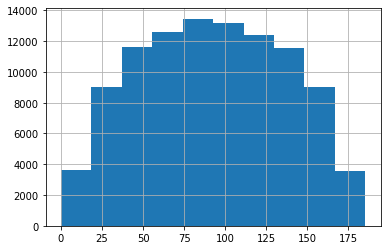

In [8]:
df0['product'].hist();

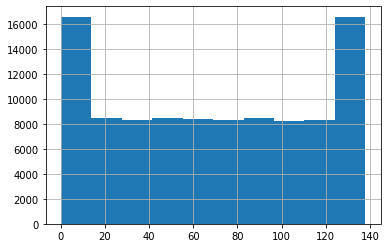

In [9]:
df1['product'].hist();

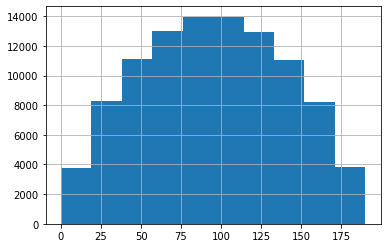

In [10]:
df2['product'].hist();

* Nenhum ajuste deverá ser feito
* Observa-se uma estrutura diferente na segunda região

## Divisão dos Dados

* Não há a necessidade de OHE e escalonamento de dados

### Primeira Região (df0)

In [11]:
features0 = df0.drop(['id','product'], axis=1)
target0= df0['product']

In [12]:
df_train_0, df_valid_0 = train_test_split(df0, test_size=0.25, random_state=12345)


In [13]:
features_train_0 = df_train_0.drop(['id','product'], axis=1)
target_train_0 = df_train_0['product']

features_valid_0 = df_valid_0.drop(['id','product'], axis=1)
target_valid_0 = df_valid_0['product']


print(features_train_0.shape)
print(target_train_0.shape)
print(features_valid_0.shape)
print(target_valid_0.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


### Segunda Região (df1)

In [14]:
features1 = df1.drop(['id','product'], axis=1)
target1= df1['product']

In [15]:
df_train_1, df_valid_1 = train_test_split(df1, test_size=0.25, random_state=12345)

In [16]:
features_train_1 = df_train_1.drop(['id','product'], axis=1)
target_train_1 = df_train_1['product']

features_valid_1 = df_valid_1.drop(['id','product'], axis=1)
target_valid_1 = df_valid_1['product']


print(features_train_1.shape)
print(target_train_1.shape)
print(features_valid_1.shape)
print(target_valid_1.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


### Terceira Região (df2)

In [17]:
features2 = df2.drop(['id','product'], axis=1)
target2= df2['product']

In [18]:
df_train_2, df_valid_2 = train_test_split(df2, test_size=0.25, random_state=12345)

In [19]:
features_train_2 = df_train_2.drop(['id','product'], axis=1)
target_train_2 = df_train_2['product']

features_valid_2 = df_valid_2.drop(['id','product'], axis=1)
target_valid_2 = df_valid_2['product']


print(features_train_2.shape)
print(target_train_2.shape)
print(features_valid_2.shape)
print(target_valid_2.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


## Treinamento & Teste

### Primeira Região (df0)

In [20]:
model = LinearRegression()

model.fit(features_train_0,target_train_0) 
predictions_valid = model.predict(features_valid_0)



result = mean_squared_error(target_valid_0, predictions_valid)**0.5


print("O REQM do modelo de regressão linear no conjunto de validação:", result)


O REQM do modelo de regressão linear no conjunto de validação: 37.5794217150813


In [21]:
df00 = pd.DataFrame({'Previsões': predictions_valid, 'Respostas Corretas': target_valid_0})
df00

,Previsões,Respostas Corretas
71751,95.894952,10.038645
80493,77.572583,114.551489
2655,77.892640,132.603635
53233,90.175134,169.072125
91141,70.510088,122.325180
...,...,...
12581,103.037104,170.116726
18456,85.403255,93.632175
73035,61.509833,127.352259
63834,118.180397,99.782700


In [22]:
print("Volume médio predito de reservas:", predictions_valid.mean())

Volume médio predito de reservas: 92.59256778438035


### Segunda Região (df1)


In [23]:
model = LinearRegression()

model.fit(features_train_1,target_train_1) 
predictions_valid1 = model.predict(features_valid_1)



result = mean_squared_error(target_valid_1, predictions_valid1)**0.5


print("O REQM do modelo de regressão linear no conjunto de validação:", result)


O REQM do modelo de regressão linear no conjunto de validação: 0.893099286775617


In [24]:
df11 = pd.DataFrame({'Previsões': predictions_valid1, 'Respostas Corretas': target_valid_1})
df11

,Previsões,Respostas Corretas
71751,82.663314,80.859783
80493,54.431786,53.906522
2655,29.748760,30.132364
53233,53.552133,53.906522
91141,1.243856,0.000000
...,...,...
12581,136.869211,137.945408
18456,110.693465,110.992147
73035,137.879341,137.945408
63834,83.761966,84.038886


In [25]:
print("Volume médio predito de reservas:", predictions_valid1.mean())

Volume médio predito de reservas: 68.728546895446


### Terceira Região (df2)

In [26]:
model = LinearRegression()

model.fit(features_train_2,target_train_2) 
predictions_valid2 = model.predict(features_valid_2)



result = mean_squared_error(target_valid_2, predictions_valid2)**0.5


print("O REQM do modelo de regressão linear no conjunto de validação:", result)


O REQM do modelo de regressão linear no conjunto de validação: 40.02970873393434


In [27]:
df22 = pd.DataFrame({'Previsões': predictions_valid2, 'Respostas Corretas': target_valid_2})
df22

,Previsões,Respostas Corretas
71751,93.599633,61.212375
80493,75.105159,41.850118
2655,90.066809,57.776581
53233,105.162375,100.053761
91141,115.303310,109.897122
...,...,...
12581,78.765887,28.492402
18456,95.603394,21.431303
73035,99.407281,125.487229
63834,77.779912,99.422903


In [28]:
print("Volume médio predito de reservas:", predictions_valid2.mean())

Volume médio predito de reservas: 94.96504596800489


### Conclusão

* A Terceira Região foi a que obteve os piores resultados, por mais que obteve o maior volume médio previsto de 94.96504596800489, isso foi a custo de um REQM de 40.02970873393434. Já a Primeira Região obteve um volume médio previsto de 92.59256778438035, com um REQM de 37.5794217150813, tendo um desempenho melhor que a Terceira Região, porém ainda com previsões não tanto certeiras. O volume médio de previsto está alto porém o quão correto ele está? Já que a Segunda região obteve o melhor REQM de 0.893099286775617, tendo previsões muito boas, mas resultaram numa queda brusca do volume médio previsto com o valor de 68.728546895446, mas mais certeiro.

## Pré Cálculo de Lucro
* Armazene todos os valores necessários para os cálculos em variáveis separadas.
* Calcule o volume de reservas suficiente para desenvolver um novo poço sem prejuizos. Compare o valor recebido com o valor médio de reservas em cada região.
* Forneça conclusões sobre a preparação para a etapa de cálculo de lucro.

**Condições**
* Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
* O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
* Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).

In [29]:
otp = 100000000
cpp=4.5
ruv=4500
vsp=otp/ruv
print('Soma do volume necessário para não ter prejuízo(200 poços):',vsp)
rpu=otp/200
vpp=rpu/ruv #utilizei a variável ruv para deixar na mesma unidade do dataframe, pois acredito que poderia utilizar a varável cpp também
print('Volume necessário para cada poço ser lucrativo:', vpp)


Soma do volume necessário para não ter prejuízo(200 poços): 22222.222222222223
Volume necessário para cada poço ser lucrativo: 111.11111111111111


### Primeira Região (df0)

In [30]:
df0500a = df0.sample(n=500,random_state=12345)
df0200a = df0500a.sort_values(by='product', ascending = False).head(200)
soma_df0200a = df0200a['product'].sum()
print('Soma dos melhores 200 de um conjunto de 500 aleatórios originais:', soma_df0200a)

Soma dos melhores 200 de um conjunto de 500 aleatórios originais: 26752.00718761


In [31]:
df0200m = df0.sort_values(by='product', ascending = False).head(200)
soma_df0200m = df0200m['product'].sum()
print('Soma dos melhores 200 originais:', soma_df0200m)


Soma dos melhores 200 originais: 36966.747929072015


In [32]:
print('Média do conjunto original:',df0['product'].mean())
print('Média dos melhores 200 de um conjunto de 500 aleatórios originais:',df0200a['product'].mean())
print('Média dos melhores 200 originais:',df0200m['product'].mean())

Média do conjunto original: 92.50000000000001
Média dos melhores 200 de um conjunto de 500 aleatórios originais: 133.76003593805
Média dos melhores 200 originais: 184.83373964536008


In [33]:
df0500ap = df00.sample(n=500,random_state=12345)
df0200ap = df0500ap.sort_values(by='Previsões', ascending = False).head(200)
soma_df0200ap = df0200ap['Previsões'].sum()
print('Soma dos melhores 200 de um conjunto de 500 aleatórios previsto:', soma_df0200ap)

Soma dos melhores 200 de um conjunto de 500 aleatórios previsto: 23345.215322290176


In [34]:
df0200mp = df00.sort_values(by='Previsões', ascending = False).head(200)
soma_df0200mp = df0200mp['Previsões'].sum()
print('Soma dos melhores 200 previsto:', soma_df0200mp)

Soma dos melhores 200 previsto: 31102.3308388114


In [35]:
print('Média do conjunto previsto:',df00['Previsões'].mean())
print('Média dos melhores 200 de um conjunto de 500 aleatórios previsto:',df0200ap['Previsões'].mean())
print('Média dos melhores 200 previsto:',df0200mp['Previsões'].mean())

Média do conjunto previsto: 92.59256778438035
Média dos melhores 200 de um conjunto de 500 aleatórios previsto: 116.72607661145088
Média dos melhores 200 previsto: 155.511654194057


### Segunda Região (df1)

In [36]:
df1500a = df1.sample(n=500,random_state=12345)
df1200a = df1500a.sort_values(by='product', ascending = False).head(200)
soma_df1200a = df1200a['product'].sum()
print('Soma dos melhores 200 de um conjunto de 500 aleatórios originais:', soma_df1200a)

Soma dos melhores 200 de um conjunto de 500 aleatórios originais: 22925.47628046755


In [37]:
df1200m = df1.sort_values(by='product', ascending = False).head(200)
soma_df1200m = df1200m['product'].sum()
print('Soma dos melhores 200 originais:', soma_df1200m)

Soma dos melhores 200 originais: 27589.081548181137


In [38]:
print('Média do conjunto original:',df1['product'].mean())
print('Média dos melhores 200 de um conjunto de 500 aleatórios originais:',df1200a['product'].mean())
print('Média dos melhores 200 originais:',df1200m['product'].mean())

Média do conjunto original: 68.82500000000002
Média dos melhores 200 de um conjunto de 500 aleatórios originais: 114.62738140233775
Média dos melhores 200 originais: 137.9454077409057


In [39]:
df1500ap = df11.sample(n=500,random_state=12345)
df1200ap = df1500ap.sort_values(by='Previsões', ascending = False).head(200)
soma_df1200ap = df1200ap['Previsões'].sum()
print('Soma dos melhores 200 de um conjunto de 500 aleatórios previsto:', soma_df1200ap)

Soma dos melhores 200 de um conjunto de 500 aleatórios previsto: 23953.82043647268


In [40]:
df1200mp = df11.sort_values(by='Previsões', ascending = False).head(200)
soma_df1200mp = df1200mp['Previsões'].sum()
print('Soma dos melhores 200 previsto:', soma_df1200mp)

Soma dos melhores 200 previsto: 27746.026782163426


In [41]:
print('Média do conjunto previsto:',df11['Previsões'].mean())
print('Média dos melhores 200 de um conjunto de 500 aleatórios previsto:',df1200ap['Previsões'].mean())
print('Média dos melhores 200 previsto:',df1200mp['Previsões'].mean())

Média do conjunto previsto: 68.728546895446
Média dos melhores 200 de um conjunto de 500 aleatórios previsto: 119.7691021823634
Média dos melhores 200 previsto: 138.73013391081713


### Terceira Região (df2)

In [42]:
df2500a = df2.sample(n=500,random_state=12345)
df2200a = df2500a.sort_values(by='product', ascending = False).head(200)
soma_df2200a = df2200a['product'].sum()
print('Soma dos melhores 200 de um conjunto de 500 aleatórios originais:', soma_df2200a)

Soma dos melhores 200 de um conjunto de 500 aleatórios originais: 27624.85559975184


In [43]:
df2200m = df2.sort_values(by='product', ascending = False).head(200)
soma_df2200m = df2200m['product'].sum()
print('Soma dos melhores 200 originais:', soma_df2200m)

Soma dos melhores 200 originais: 37910.29539635329


In [44]:
print('Média do conjunto original:',df2['product'].mean())
print('Média dos melhores 200 de um conjunto de 500 aleatórios originais:',df2200a['product'].mean())
print('Média dos melhores 200 originais:',df2200m['product'].mean())

Média do conjunto original: 95.00000000000004
Média dos melhores 200 de um conjunto de 500 aleatórios originais: 138.1242779987592
Média dos melhores 200 originais: 189.55147698176646


In [45]:
df2500ap = df22.sample(n=500,random_state=12345)
df2200ap = df2500ap.sort_values(by='Previsões', ascending = False).head(200)
soma_df2200ap = df2200ap['Previsões'].sum()
print('Soma dos melhores 200 de um conjunto de 500 aleatórios previsto:', soma_df2200ap)

Soma dos melhores 200 de um conjunto de 500 aleatórios previsto: 22978.221506140973


In [46]:
df2200mp = df22.sort_values(by='Previsões', ascending = False).head(200)
soma_df2200mp = df2200mp['Previsões'].sum()
print('Soma dos melhores 200 previsto:', soma_df2200mp)

Soma dos melhores 200 previsto: 29603.898658318347


In [47]:
print('Média do conjunto previsto:',df22['Previsões'].mean())
print('Média dos melhores 200 de um conjunto de 500 aleatórios previsto:',df2200ap['Previsões'].mean())
print('Média dos melhores 200 previsto:',df2200mp['Previsões'].mean())

Média do conjunto previsto: 94.96504596800489
Média dos melhores 200 de um conjunto de 500 aleatórios previsto: 114.89110753070487
Média dos melhores 200 previsto: 148.01949329159174


### Conclusão

* Todos obtiveram lucro já que ficaram acima do valor mínimo de 22222. Porém ao comparar com o valor de cada poço e suas médias previstas calculadadas anteriormente nenhuma obteve lucro, a Terceira Região foi a que chegou mais perto do valor de 111 com 94 de média. Concluindo que para a obtenção de lucro acontecer será necessário a implantação de 200 poços pois apenas um pode ser muito arriscado. 

* Primeira Região: Os melhores 200 tiveram valores acima dos melhores 200 aleatórios, o que era de se esperar, porém os melhores 200 originais tem uma soma maior do que os melhores 200 previsto o que significa que o modelo esta errando sua previsão para baixo normalmente. 
* Segunda Região: O mesmo acontece em relaçao aos melhores 200 e os melhores 200 aleatórios. Observamos uma mudança no comportamento comparando os valores originais e previstos, os melhores 200 originais tem uma soma menor que os melhores 200 previsto o que significa que o modelo esta errando sua previsão para cima normalmente. 
* Terceira Região: Mesmo comportamento da primeira região, Os melhores 200 tiveram valores acima dos melhores 200 aleatórios e os melhores 200 originais tem uma soma maior do que os melhores 200 previsto.

* Proximidade de Valores: A região que teve os valores previstos mais próximos que os originais foi a Segunda Região já que tem seu REQM mais baixo, essa ordem segue os mesmos valores de REQM do mais baixo ao mais alto. Falando de previsões mais altas a Terceira Região obteve os melhores números (já que seu REQM é o maior), porém a custo de uma acertividade mais baixa.

* Médias: As médias entre os conjuntos originais e previstos comparadas entre sua própria região são muito próximos. As médias comparadas entre si nos conjuntos aleatórios de sua respectiva região não são próximos, concluindo que mesmo se pegarmos um conjunto de 500 aleatórios sendo previsto ou não e escolhermos os 200 melhores irá ter um aumento na média.

## Função de Cálculo de Lucro

* Escreva uma função para calcular lucro de um conjunto de poços de petróleo selecionados e predições do modelo:
* Escolha os poços com os valores mais altos de predições.
* Sumarize o volume alvo de reservas de acordo com essas predições.
* Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha. Calcule o lucro para o volume de reservas recebido.

**Condições**
* Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
* O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
* Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).

In [48]:
def lucro(dataframe1, coluna1):
    x = (dataframe1[coluna1]*4500)
    x.hist()
    y = (x.sum()) - 100000000
        
    return y

### Primeira Região (df0)

In [49]:
df00200=df00.sort_values(by='Previsões', ascending = False).head(200)

Lucro da Primeira Região: 39960488.77465129


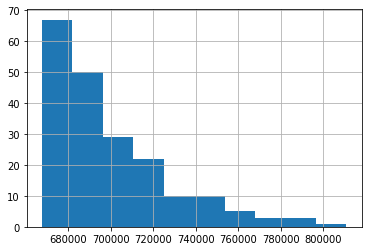

In [50]:
lucro0o = lucro(df00200,'Previsões')
print('Lucro da Primeira Região:',lucro0o)

### Segunda Região (df1)

In [51]:
df11200=df11.sort_values(by='Previsões', ascending = False).head(200)

Lucro da Segunda Região: 24857120.519735426


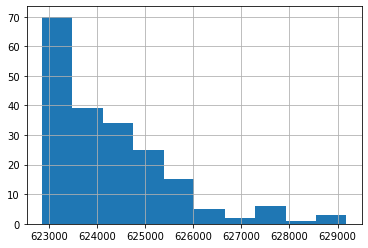

In [52]:
lucro1o = lucro(df11200, 'Previsões')
print('Lucro da Segunda Região:',lucro1o)

### Terceira Região (df2)

In [53]:
df22200=df22.sort_values(by='Previsões', ascending = False).head(200)

Lucro da Terceira Região: 33217543.962432563


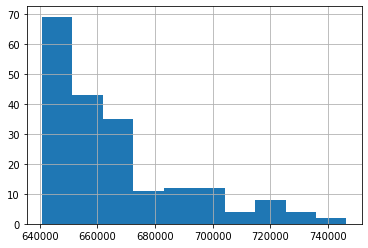

In [54]:
lucro2o = lucro(df22200, 'Previsões')
print('Lucro da Terceira Região:',lucro2o)

### Conclusão

* A Primeira Região obteve o melhor resultado dentre os melhores 200 poços previstos. Logo atrás vem a Terceira Região, acredito que deve-se ao fato do primeiro gráfico ter uma forma parecida entre essas duas regiões.

## Riscos e Lucros

Calcule riscos e lucro para cada região:
* Utilize a técnica de bootstrapping com 1000 amostras para encontrar a distribuição de lucros.
* Encontre lucro médio, intervalo de confiança de 95% e risco de prejuízo. Prejuízo é um lucro negativo, calcule-o como uma probabilidade e depois o expresse como uma porcentagem.
* Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha.

In [55]:
def boot(data):
    n_bootstrap = 1000

    bootstrap_lucros = []

    for i in range(n_bootstrap):
        bootstrap_sample = data.sample(500, replace=True)
        bootstrap_lucros.append(
            (
                bootstrap_sample
                .sort_values("Previsões", ascending=False)
                .head(200)['Respostas Corretas']
                .sum()
            ) * ruv - otp
        )

    bootstrap_lucros = np.array(bootstrap_lucros)

    media_lucro = bootstrap_lucros.mean()
    lower_bound = np.percentile(bootstrap_lucros, 2.5)
    upper_bound = np.percentile(bootstrap_lucros, 97.5)

    prejuizo_probabilidade = np.mean(bootstrap_lucros < 0)
    prejuizo_porcentagem = prejuizo_probabilidade * 100

    print("Lucro médio:", media_lucro)
    print("Intervalo de confiança de 95%:", lower_bound, "-", upper_bound)
    print("Risco de prejuízo:", prejuizo_porcentagem, "%")

### Primeira Região (df0)

In [56]:
boot(df00)

Lucro médio: 3828396.346542066
Intervalo de confiança de 95%: -957190.3445249762 - 8720177.099539476
Risco de prejuízo: 6.6000000000000005 %


### Segunda Região (df1)

In [57]:
boot(df11)

Lucro médio: 4548488.163956924
Intervalo de confiança de 95%: 595432.5039804567 - 8616287.588134633
Risco de prejuízo: 1.0 %


### Terceira Região (df2)

In [58]:
boot(df22)

Lucro médio: 3883779.947521514
Intervalo de confiança de 95%: -1430184.8620459256 - 9181842.512214093
Risco de prejuízo: 9.2 %


### Conclusão

* A segunda Região obteve os melhores resultados, tanto lucro médio, intervalo de confiança quanto o risco de prejuízo.

## Conclusão Geral

* A Terceira Região apresentou comportamentos muito semelhante a da Primeira. Comparado com a Segunda Região, a Segunda Região obteve resultados melhores nos testes de mais importância como a técnica de bootstrapping, pois acredito que ao escolher uma região deve-se levar em conta toda ela e não apenas os melhores resultados. Nota-se um comportamento diferente da Segunda Região perante as demais pela sua 'população' estar disposta de forma diferente nos gráficos. Acredito que isso fez com que a Segunda Região se saisse melhor no bootstrap e consequentemente ser a região escolhida pois tem mais lucro médio, um intervalo de confinça melhor e principalmente a menor porcentagem de prejuízo.

**A região escolhida foi a Segunda**